## Requirements:
1) Use a conda distribution with numpy, scipy, matplotlib and pandas. If not, install with pip. 

2) Install cvxpy using: 

    pip install cvxpy
    
3) You can test the installation with nose:
    
    pip install nose
    
    nosetests cvxpy

In [19]:
%run -i 'src/SPV.py'
from src.data_functions import *
from src.solution_algorithms import *

## Load Generation, Demand and Prices Data
Download the csv files from:

https://www.dropbox.com/s/o0qcyalnnhbeqsu/full_randomized_2017_hourly_normalized_v2.csv?dl=0

https://www.dropbox.com/s/1qkkg6s4yndnohm/LMP_2017_data.csv?dl=0

Add the csv files to data folder

In [2]:
df = pd.read_csv('data/full_randomized_2017_hourly_normalized_v2.csv') #Load demand and solar generation per kW dataframe
df2 = pd.read_csv('data/LMP_2017_data.csv') #Load wholesale prices data

## Obtain lists, matrices and arrays from dataframes

In [3]:
dataids = obtain_dataid_2017(df) #list of dataids of firms
dataids_array = np.asarray(dataids) #numpy array of dataids 
validdata = len(dataids) #Total of firms
T = len(df[df.dataid==26].use.values) #Total of time slots
localtime_data = df[df.dataid==26].localhour #Hour data of time slots

In [4]:
gen_kw = f_gen_per_kw(df) #Matrix of normalized solar generation: Rows are timeslots and columns are firms
load_kw = f_load_kw(df) #Matrix of load: Rows are timeslots and columns are firms

1 m$^2$ is 1550 in$^2$

Typical size of solar panel: is 65 in for 39 in = 2535 in$^2$ = 1.6354 m$^2$.

The rated power of a solar panel is typically between 250 to 350W.

To convert we use: gen_per_kw by 0.3 / 1.6354 to get gen_per_m$^2$.

In [5]:
gen_per_m2 = gen_kw*0.3/1.6354

In [7]:
#Investment per m2 is 512.2 $/m2.
#Using an anualized cost with discount rate r=5%, we obtain
CostPVperM2 = 512.2
r = 0.05
years = 20
annuity = CostPVperM2*r/(1-(1+r)**(-years)) #Obtain Annuity 
pi_s = annuity/T #Obtain cost per time step
print('Cost of PV per time step: ' + str(pi_s))

Cost of PV per time step: 0.004695025492240356


In [8]:
firms = validdata #Number of firms
gamma = 1 #Factor of NM price
pi_r = 0.18   #Retail Price at 18 cents per kWh.
pi_nm = gamma*pi_r  #Net Metering Price
a_cap_firms = f_cap_firms(gen_per_m2, load_kw) #Cap for firms to not be net producers

In [9]:
pi_g = f_lmp_prices(df2) #Obtain wholesale market prices: Data is in $/MWh
pi_g = pi_g/1000 # convert to $/kWh

## Run Case 1: Limited maximum panel area

In [ ]:
a_max_firms = 0.2*a_cap_firms
pv_changes = []
gamma = np.linspace(0,1,21)
#gamma = [0.9]

#Run the sharing case (that is not affected by gamma)
soluc_sharing = solve_sharing_collective(gen_per_m2, load_kw, dataids_array, a_max_firms, pi_s, pi_r) #Obtain the set of firms that invest
sol_sharing = firms_investment_sharing(soluc_sharing, a_max_firms, firms) #Obtain the investment decision of all firms
clear_output() #Comment this line to check the intermediate steps of the algorithm

for g in gamma:
    pi_nm = g*pi_r
    %run -i 'src/Case_01.py'
    pv_changes.append(aux)
    clear_output()

In [ ]:
#Plot pv changes between standalone and sharing case
plt.plot(gamma, pv_changes)

In [ ]:
# pi_nm = 0.9*pi_r
# investment_standalone = solve_standalone(gen_per_m2, load_kw, dataids, a_max_firms, pi_s, pi_r, pi_nm) #Solve a particular case you are interested

In [ ]:
print('\n')
print('Investment decisions:')
print(investment_standalone) #Print investment decisions
print('\n')
print('Percentage of investment per firm (with respect to max_cap)')
print(1-(a_max_firms - investment_standalone)/a_max_firms) #Print percentage of investment of available max cap
print('\n Total Investment of PV in standalone case is '+ str(sum(investment_standalone)) + ' in m2 \n')

## Run Case 2: Effect of annual cap

In [55]:
a_max_firms = 1.5*a_cap_firms
#gamma = np.linspace(0,1,21)
gamma = [0.9]

In [56]:
## Run Sharing model
soluc_sharing = solve_sharing_collective(gen_per_m2, load_kw, dataids_array, a_max_firms, pi_s, pi_r) #Obtain the set of firms that invest
sol_sharing = firms_investment_sharing(soluc_sharing, a_max_firms, firms) #Obtain the investment decision of all firms
clear_output()



Iteration: 1
firm removed from S: 88 with dataid 6139
Set of firms that invest:
[148, 186, 546, 751, 407, 153, 777, 919, 392, 939, 712, 882, 906, 187, 493, 146, 97, 488, 182, 602, 173, 144, 5, 542, 156, 123, 534, 982, 90, 145, 594, 658, 839, 264, 721, 807, 730, 279, 849, 586, 726, 497, 958, 57, 613, 749, 350, 377, 411, 185, 29, 65, 81, 180, 582, 302, 447, 262, 690, 828, 758, 754, 678, 272, 274, 95, 519, 285, 576, 703, 840, 794, 345, 619, 785, 851, 476, 298, 791, 408, 806, 369, 626, 741, 484, 940, 536, 6, 366, 92, 996, 160, 164, 409, 647, 925, 944, 796, 830, 725, 645, 991, 652, 237, 503, 38, 116, 314, 815, 845, 921, 579, 444, 983, 504, 309, 451, 896, 967, 817, 217, 677, 448, 872, 178, 642, 24, 618, 827, 396, 155, 660, 885, 912, 235, 970, 585, 165, 943, 232, 553, 167, 571, 172, 689, 655, 867, 657, 735, 963, 631, 701, 486, 457, 59, 862, 945, 740, 696, 771, 811, 731, 70, 732, 236, 545, 318, 876, 787, 934, 965, 210, 539, 833, 421, 17, 598, 713, 466, 813, 744, 544, 593, 623, 31, 286, 995, 

In [57]:
# Run standalone models for each gamma
for g in gamma:
    pi_nm = g*pi_r
    investment_standalone = solve_standalone(gen_per_m2, load_kw, dataids, a_cap_firms, pi_s, pi_r, pi_nm)
    clear_output()

In [58]:
print(np.sum(sol_sharing)) #Print total PV investment in Sharing Model
print(np.sum(investment_standalone)) #Print total PV investment in Standalone Model
print((-np.sum(investment_standalone)+np.sum(sol_sharing))/np.sum(sol_sharing) ) #Print increase (or decrease) of PV investment between models

7700.051016453402
6443.51045420801
0.16318600481482876


In [59]:
total_gen_per_m2 = np.sum(gen_per_m2, axis=0) #Obtain sum of gen per m2, per firm
sorted_dataids_maxgen = np.argsort(-total_gen_per_m2) #Sort firms from high total irradiance to low irradiance
#print(sol_sharing[sorted_dataids_maxgen])
#print('/n')
#print(investment_standalone[sorted_dataids_maxgen])
sharing_cumsum = np.cumsum(sol_sharing[sorted_dataids_maxgen]) #Compute cumulative sum of PV investment for sorted firms in sharing model
standalone_cumsum = np.cumsum(investment_standalone[sorted_dataids_maxgen]) #Compute cumuliative sum of PV investment for sorted firms in standalone model

[ 81.3886903   77.56319698  53.94059817  94.73934227  50.17935773
  89.80005995  93.95680133  73.5156289   91.08333723  52.3542525
 147.73521598  79.88188593  73.32551573 109.22059611 101.273456
 106.34295437  58.11617527  59.89514042 138.95507596  54.63163566
  57.64981786  63.77903295  64.53406815 169.28265535  65.29382393
  68.94660299  83.0940963   79.9091191   57.35531368  93.07596307
 108.05651962  73.73877288  64.0305249  105.49181556  64.61371569
  77.31100497 102.10948599  92.26280023  59.74525265  82.40563696
 101.3246013   90.05151657 123.58431715 153.65915376  69.73056773
 103.23283754  70.06542557 141.38544298  76.59723212  93.18910193
  69.79070427  99.73215539  63.26888726 114.80976384  82.88634477
  92.83480688 147.16730353  64.62149488  89.03194401  95.68949439
  44.13695454  62.47370567  70.82571308  75.60483783  79.18548667
 135.20327519  40.30493344  56.97632724  58.62751837  94.46450116
  84.74835932 108.01762991  87.53822615  78.48939111   0.
  45.82616106  65.769

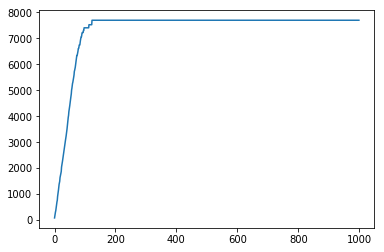

In [60]:
plt.plot(sharing_cumsum)

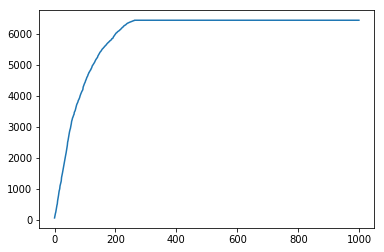

In [61]:
plt.plot(standalone_cumsum)

In [63]:
# Save data if you are interested to plot in other software
np.savetxt("sharing_cumsum.csv", sharing_cumsum, delimiter=",")
np.savetxt("standalone_cumsum.csv", standalone_cumsum, delimiter=",")

## Run Case 3: Effect of demand charge in wholesale market prices

In [16]:
a_max_firms = 2*a_cap_firms
pi_s_array = np.linspace(0.08, 0.2, 30)*pi_s

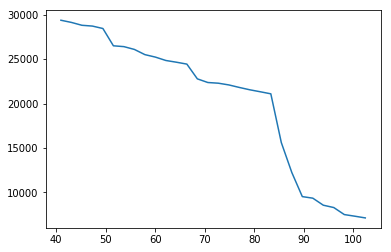

In [17]:
pi_g2 = pi_g
#pi_s_array = np.asarray([0.15*pi_s])
sol_wholesale_list_dcharge = []
demand_charge = 10 #in $/kWp
# Solve with demand charge for different costs of solar
for pi_s2 in pi_s_array:
    soluc_wholesale = solve_wholesale_aggregator_demandcharge(gen_per_m2, load_kw, a_max_firms, pi_s2, pi_g2, demand_charge)
    sol_wholesale_list_dcharge.append(np.sum(soluc_wholesale))
    clear_output()
levelized_cost_array = (1-(1+r)**(-years))/r * pi_s_array*T #Obtain overnight cost of PV
plt.plot(levelized_cost_array, sol_wholesale_list_dcharge)

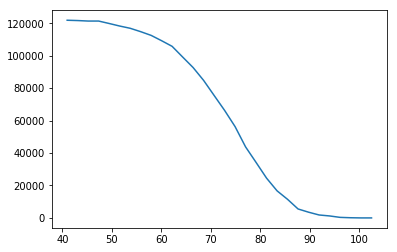

In [18]:
sol_wholesale_list = []
# Solve without demand charge for different costs of solar
for pi_s2 in pi_s_array:
    soluc_wholesale_energy = solve_wholesale_aggregator(gen_per_m2, load_kw, a_max_firms, pi_s2, pi_g2)
    sol_wholesale_list.append(np.sum(soluc_wholesale_energy))
    clear_output()
levelized_cost_array = (1-(1+r)**(-years))/r * pi_s_array*T #Obtain overnight cost of PV
plt.plot(levelized_cost_array, sol_wholesale_list)

In [24]:
e_cost = wholesale_energy_costs(gen_per_m2,  load_kw, soluc_wholesale, pi_g) #Print energy costs for the collective with the solution of investment
print(e_cost)
e_cost = wholesale_energy_costs(gen_per_m2,  load_kw, 0, pi_g) #Print energy costs for the collective without investment in PV
print(e_cost)

46.49627836971733
46.49627836971733
0.0


In [23]:
d_cost = wholesale_demand_charge_costs(gen_per_m2, load_kw, soluc_wholesale, 10) #Print demand charge for the collective with the solution of investment
print(np.sum(d_cost))
zero_sol = np.zeros(validdata)
d_cost = wholesale_demand_charge_costs(gen_per_m2, load_kw, zero_sol, 10) #Print demand charge for the collective without investment in PV
print(np.sum(d_cost))

38.45957930610138
38.45957930610138


In [27]:
tot_d_cost = np.sum(d_cost)
e_proportion = e_cost/(tot_d_cost+e_cost)*100
print(e_proportion) #Print proportion of energy costs with respect to total costs without PV investment

54.729926389704055


## Explore changes in profits for the Utility

In [ ]:
avg_profit_nopv = utility_profit_no_investment(load_kw, pi_r)

In [ ]:
avg_profit_standalone = utility_profit_standalone(gen_per_m2, load_kw, investment_standalone, pi_r, pi_nm)

In [ ]:
avg_profit_sharing = utility_profit_sharing(gen_per_m2, load_kw, sol_sharing, pi_r)

In [ ]:
pi_s_array = np.linspace(0.1, 0.2, 11)*pi_s
print(pi_s_array)

In [ ]:
np.sum(load_kw, axis=1).size

In [ ]:
aux = a_max_firms*gen_per_m2

In [ ]:
print(aux[10,1])
print(gen_per_m2[10,1])
print(a_max_firms[1]*gen_per_m2[10,1])

In [ ]:
df3 = df2.groupby(['OPR_HR']).mean()
print(df3)

In [ ]:
df4 = df2.mean()

In [ ]:
print(df4)

In [ ]:
A = np.array([[1,2],[3,4]])
b = np.array([[1,2]])
sol1 = np.dot(A,b.T)
sol2 = np.matmul(A,b.T)
print(sol1)
print(sol2)

In [ ]:
31+28+31

In [ ]:
localtime_data[24*334:]

In [ ]:
load_cost_matrix = (load_kw.T * pi_g).T

In [ ]:
load_cost_january = load_cost_matrix[0:24*31-1, :]

In [ ]:
load_cost_january.shape

In [ ]:
np.max([1,2,4])